# Visualtion of P79, Aran og FRIC data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import h5py

### Load data

In [5]:
data_aran_hh = pd.read_csv('../data/raw/ref_data/cph1_aran_hh.csv', sep=';', encoding='unicode_escape')
data_aran_vh = pd.read_csv('../data/raw/ref_data/cph1_aran_vh.csv', sep=';', encoding='unicode_escape')

data_fric_hh = pd.read_csv('../data/raw/ref_data/cph1_fric_hh.csv', sep=';', encoding='unicode_escape')
data_fric_vh = pd.read_csv('../data/raw/ref_data/cph1_fric_vh.csv', sep=';', encoding='unicode_escape')

data_zp_hh = pd.read_csv('../data/raw/ref_data/cph1_zp_hh.csv', sep=';', encoding='unicode_escape')
data_zp_vh = pd.read_csv('../data/raw/ref_data/cph1_zp_vh.csv', sep=';', encoding='unicode_escape')

data_mpd_hh = pd.read_csv('../data/raw/ref_data/cph1_iri_mpd_rut_hh.csv', sep=';', encoding='unicode_escape')
data_mpd_vh = pd.read_csv('../data/raw/ref_data/cph1_iri_mpd_rut_vh.csv', sep=';', encoding='unicode_escape')

Show the car trip as a line plot gif

KeyboardInterrupt: 

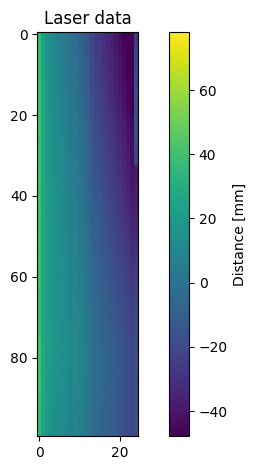

In [6]:
laser_data = data_zp_hh.to_numpy()[:, 1:26]

time_steps = 100

# Create gif
fig, ax = plt.subplots()

mesh = ax.imshow(laser_data[:time_steps][::-1], cmap='viridis')
cb = plt.colorbar(mesh)
cb.set_label('Distance [mm]')
ax.set_title('Laser data')
plt.tight_layout()

def animate(frame):
    i = frame*15
    mesh.set_data(laser_data[i:time_steps+i][::-1])
    return mesh

ani = animation.FuncAnimation(fig, animate, frames=500, interval=100)
ani.save('../reports/figures/laser_data.gif', writer='pillow', fps=30)
plt.close()

KeyboardInterrupt: 

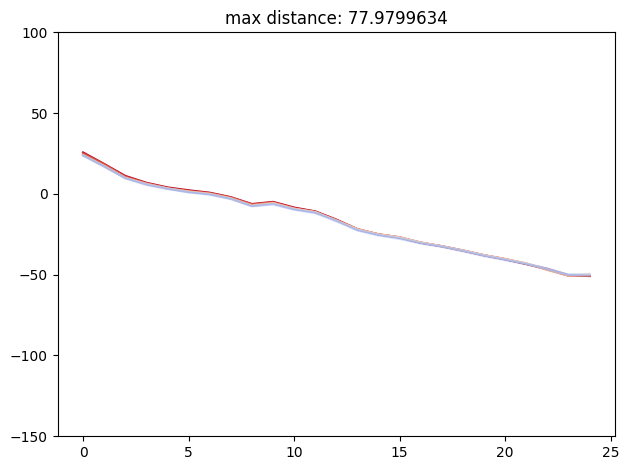

In [8]:
laser_data = data_zp_hh.to_numpy()[:, 1:26]

# Create gif
fig, ax = plt.subplots()

lines = [ax.plot(laser_data[0], c=cm.coolwarm(a), alpha=a) for a in np. linspace(0.1, 1, 10)[::-1]]
ax.set_ylim(-150, 100)
ax.set_title(f'max distance: {np.max(laser_data[0])}')
plt.tight_layout()

def animate(frame):
    frame *= 20
    # plot lines with diminishing alpha
    for i, line in enumerate(lines):
        if frame - i > 0:
            line[0].set_ydata(laser_data[frame - i])
    ax.set_title(f'max distance: {np.max(laser_data[frame])}')
    return mesh

ani = animation.FuncAnimation(fig, animate, frames=1000, interval=10, blit=False)
ani.save('../reports/figures/laser_data_line.gif', writer='pillow')
plt.show()
plt.close()

### Investigate the longitude and latitude

In [25]:
data_aran_hh.columns.to_list()

['L_Route_ID',
 'DCSTimeStamp',
 'BeginChainage',
 'EndChainage',
 'Venstre IRI (m/km)',
 'Højre IRI (m/km)',
 'Rivninger MeanRI (cm³/m²)',
 'Rivninger MeanExistingRI (cm³/m²)',
 'Rivninger MeanRPI (cm³/m²)',
 'Rivninger MeanAVC (cm³/m²)',
 'Venstre Wheelpath Texture MPD (mm)',
 'Center Texture MPD (mm)',
 'Højre Wheelpath Texture MPD (mm)',
 'Left Texture Lasers MPD (mm)',
 'Right Texture Lasers MPD (mm)',
 'Krakeleringer Små (m²)',
 'Krakeleringer Middelstore (m²)',
 'Krakeleringer Store (m²)',
 'Krakeleringer AVG Width (mm)',
 'Krakeleringer MIN Width (mm)',
 'Krakeleringer MAX Width (mm)',
 'Krakeleringer MIN Depth (mm)',
 'Krakeleringer MAX Depth (mm)',
 'Revner På Langs Små (m)',
 'Revner På Langs Middelstore (m)',
 'Revner På Langs Store (m)',
 'Revner På Langs Sealed (m)',
 'Revner På Langs AVG Width (mm)',
 'Revner På Langs MIN Width (mm)',
 'Revner På Langs MAX Width (mm)',
 'Revner På Langs MIN Depth (mm)',
 'Revner På Langs MAX Depth (mm)',
 'Transverse Low (m)',
 'Transver

In [11]:
data_fric_hh.head()

,Time [ms],V,H,v_MW_V [km/t],v_MW_H [km/t],Slip_V [%],Slip_H [%],v_TW [km/t],TotalDist [m],Lat,Lon,F_vertikal_V [N],F_vertikal_H [N],F_friksjon_V [N],F_friksjon_H [N],Bearing
0,1306,0.194,0.109,41.719,41.700,0.995,1.030,41.548,11.167,NaN,NaN,1067,1062,154,137,NaN
1,1805,0.520,0.291,37.640,39.047,5.918,2.820,39.706,16.167,NaN,NaN,1055,1035,496,322,NaN
2,2306,1.036,0.775,27.963,34.903,26.491,8.785,37.571,21.167,NaN,NaN,1083,1046,1069,831,NaN
3,2776,0.617,0.876,22.685,29.093,36.454,19.065,35.263,26.167,NaN,NaN,1083,1048,614,938,NaN
4,3306,0.524,0.709,25.241,26.384,24.132,21.301,33.133,31.167,NaN,NaN,1090,1069,517,779,NaN


In [13]:
data_zp_hh.head()

,Distance [m],Laser 1 [mm],Laser 2 [mm],Laser 3 [mm],Laser 4 [mm],Laser 5 [mm],Laser 6 [mm],Laser 7 [mm],Laser 8 [mm],Laser 9 [mm],...,Laser 22 [mm],Laser 23 [mm],Laser 24 [mm],Laser 25 [mm],Lat,Lon,Højde,GeoHøjde,Alt,Bearing
0,0.000000,77.979963,76.129577,73.432504,72.343552,71.085527,70.748823,71.221280,69.414377,66.948905,...,47.506321,44.715228,42.602378,40.864356,55.652685,12.488391,12.8,38.400002,51.200002,87.366884
1,0.100709,77.577069,75.484964,72.750423,71.660123,70.377488,69.797778,70.464433,69.102455,66.336974,...,47.033870,44.391341,42.129228,41.160619,55.652685,12.488392,12.8,38.400002,51.200002,87.366884
2,0.201419,76.674610,74.928609,72.165267,70.970617,69.588610,69.407065,69.937898,68.307188,65.791922,...,46.652856,44.162898,42.144453,41.047513,55.652685,12.488394,12.8,38.400002,51.200002,87.366884
3,0.302128,76.192724,74.535890,71.536658,70.283476,69.134717,68.887796,69.609289,68.062037,65.154582,...,46.271888,43.681742,41.807248,40.788764,55.652685,12.488396,12.8,38.400002,51.200002,87.366884
4,0.402838,75.589468,73.560795,70.603412,69.809506,68.749661,68.331567,69.250653,67.711902,64.769605,...,45.982650,43.383675,41.542447,40.443700,55.652685,12.488397,12.8,38.400002,51.200002,87.309725


In [14]:
print(data_mpd_hh.head())
print(data_mpd_hh.shape)

   Distance [m]   IRI (5) [m/km]   IRI (21) [m/km]     MPD 1     MPD 2   
0             0         2.065143          2.234953  0.698099  0.655793  \
1            10         2.648073          2.618341  0.700992  0.682690   
2            20         3.707996          3.715987  0.568107  0.634094   
3            30         2.357937          3.127441  0.654012  0.604160   
4            40         2.417743          3.780454  0.585352  0.628782   

    Venstre sporkøring [mm]   Højre sporkøring [mm]  
0                  3.446989                1.650657  
1                  3.751637                1.712625  
2                  3.744193                2.383122  
3                  2.941264                1.658154  
4                  3.572862                2.241279  
(2537, 7)


In [118]:
# Create class for metrics

def CrackingSum(df, spatial_resolution):
    LCS = df['Revner På Langs Små (m)'].fillna(0)/spatial_resolution
    LCM = df['Revner På Langs Middelstore (m)'].fillna(0)/spatial_resolution
    LCL = df['Revner På Langs Store (m)'].fillna(0)/spatial_resolution
    TCS = df['Transverse Low (m)'].fillna(0)/spatial_resolution
    TCM = df['Transverse Medium (m)'].fillna(0)/spatial_resolution
    TCL = df['Transverse High (m)'].fillna(0)/spatial_resolution
    return (LCS**2 + LCM**3 + LCL**4 + 3*TCS + 4*TCM + 5*TCL)**(0.1)

def PatchingSum(df, spatial_resolution):
    LCSe = df['Revner På Langs Sealed (m)'].fillna(0)/spatial_resolution
    TCSe = df['Transverse Sealed (m)'].fillna(0)/spatial_resolution
    return (LCSe**2 + 2*TCSe)**(0.1)

def AlligatorSum(df):
    ACS = 0
    ACM = 0
    ACL = 0
    return (3*ACS + 4*ACM + 5*ACL)**(0.3)

def PotholeSum(df):
    PAS = 0
    PAM = 0
    PAL = 0
    PAD = 0
    return (5*PAS + 7*PAM +10*PAL +5*PAD)**(0.1)

def RuttingMean(df):
    RDL = 0
    RDR = 0
    return ((RDL +RDR)/2)**(0.5)

def IRIMean(df):
    IRL = 0
    IRR = 0
    return ((IRL + IRR)/2)**(0.2)

## Investigating Metrics

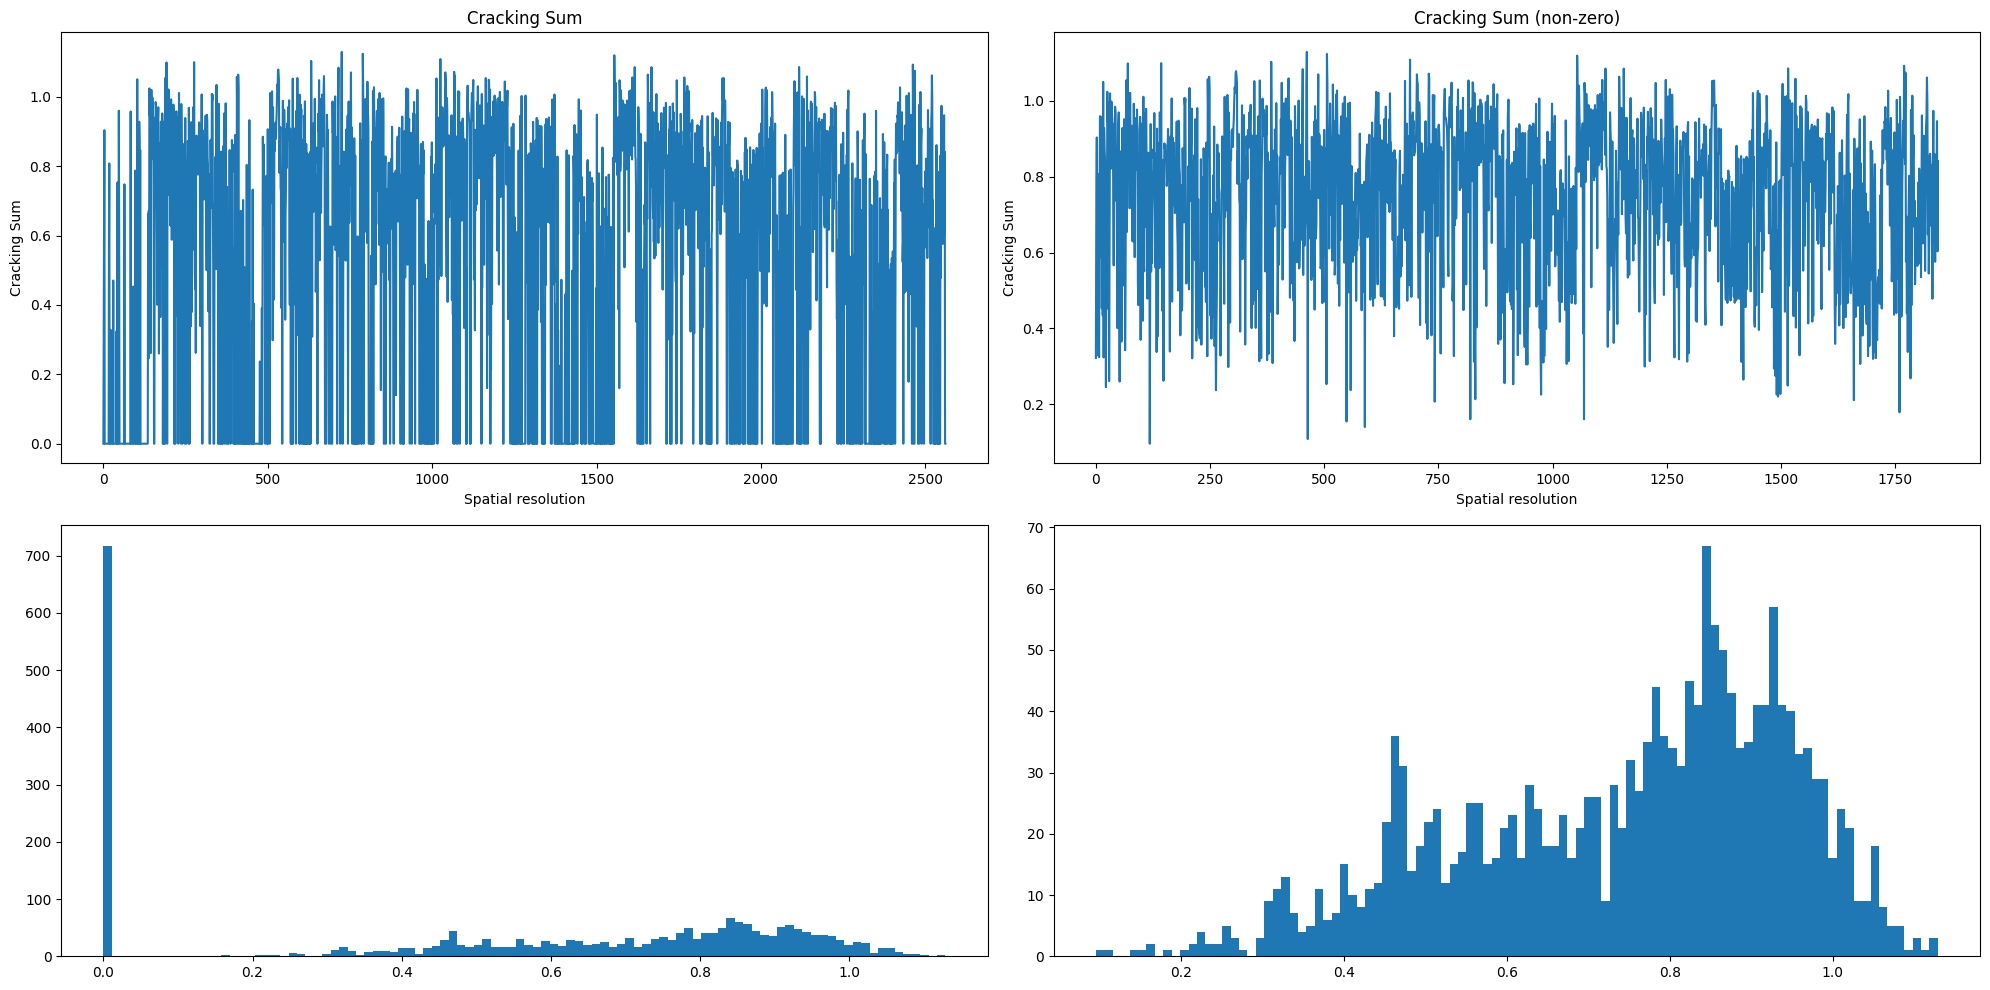

In [126]:
spatial_resolution = 10
alt = data_aran_hh.fillna(0).groupby((data_aran_hh.index // spatial_resolution) + 1).sum().reset_index(drop=True)

cs = CrackingSum(alt, spatial_resolution)
cs_non_zero = cs[cs != 0].reset_index(drop=True)
# Plot cs
fig, ax = plt.subplots(2,2, figsize=(20, 10))
ax = ax.flatten()
ax[0].plot(cs)
ax[0].set(title='Cracking Sum', xlabel='Spatial resolution', ylabel='Cracking Sum')
ax[1].plot(cs_non_zero)
ax[1].set(title='Cracking Sum (non-zero)', xlabel='Spatial resolution', ylabel='Cracking Sum')
ax[2].hist(cs, bins=100)
ax[3].hist(cs_non_zero, bins=100)
plt.tight_layout()
plt.show()

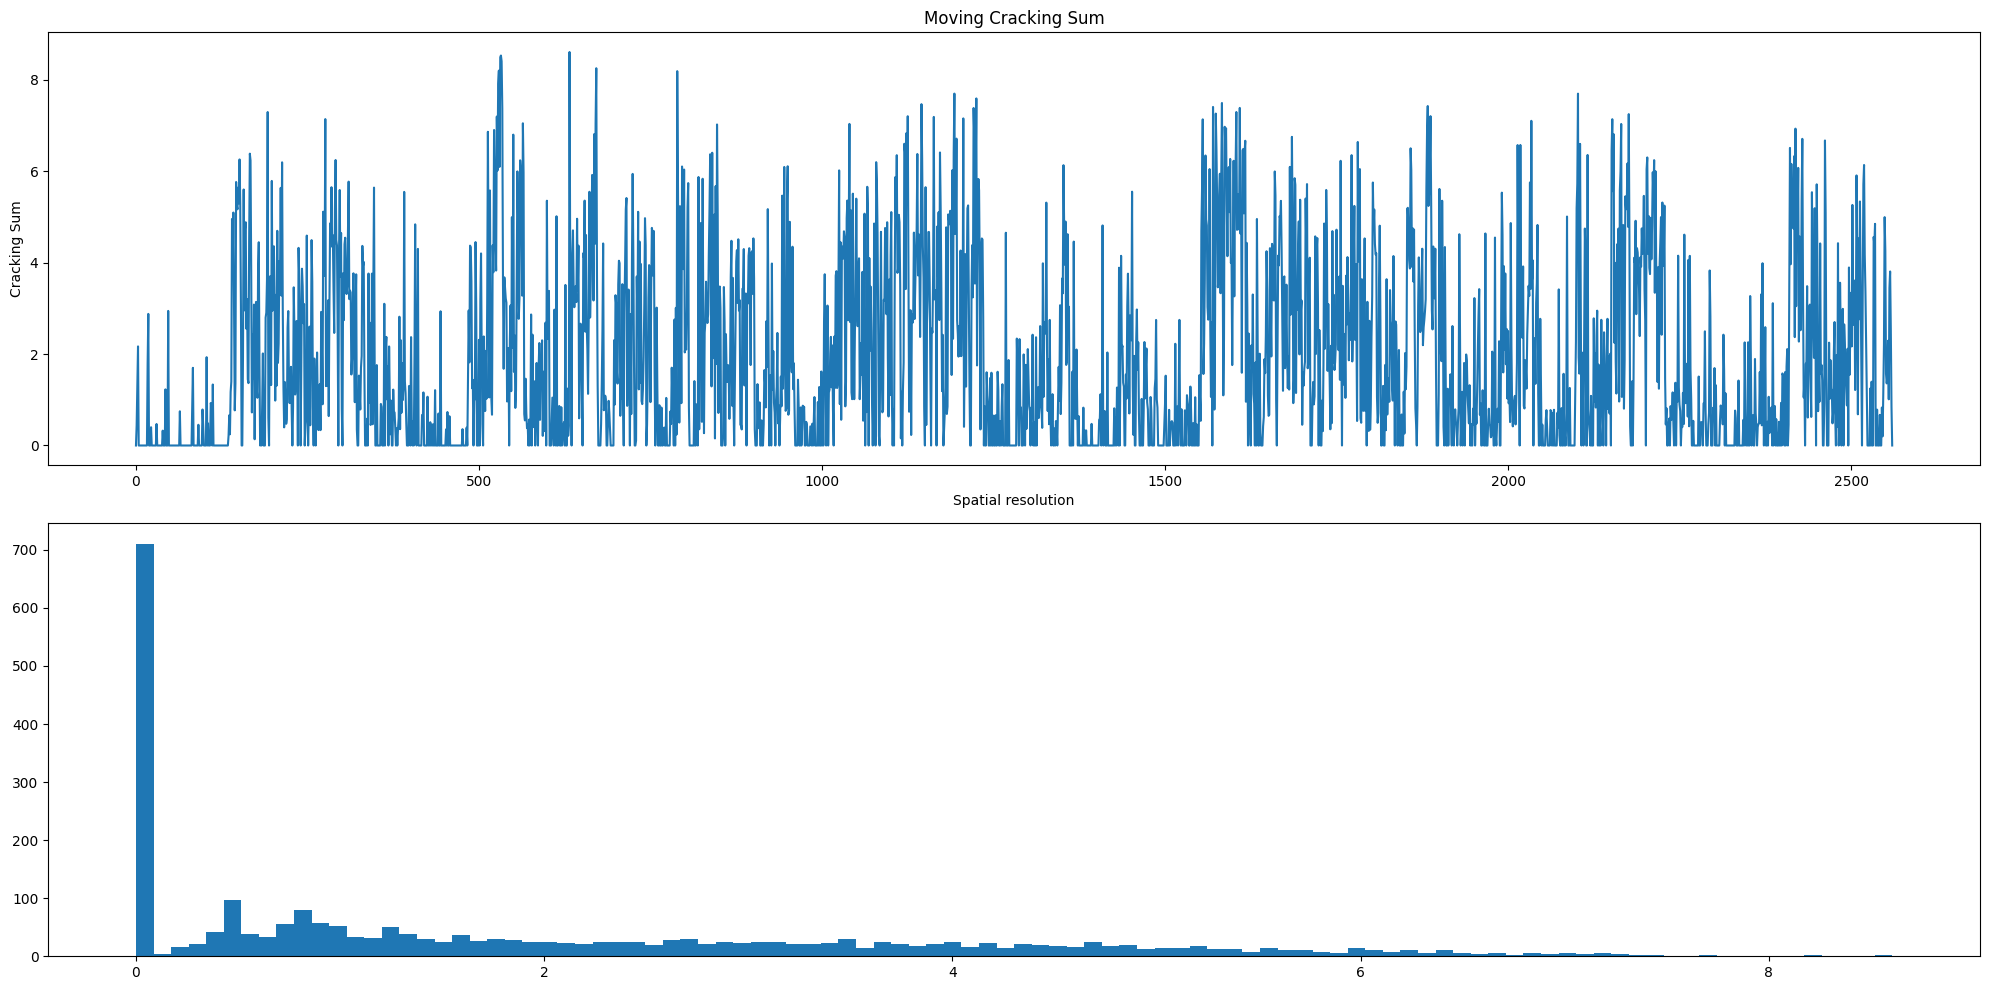

In [128]:
alt_ = data_aran_hh.fillna(0)
# Calculate moving cracking sum
cs_m = []
for i in range(1, len(alt_)-spatial_resolution, spatial_resolution):
    cs_m.append(CrackingSum(alt_.iloc[i:i+spatial_resolution], spatial_resolution).sum())

fig, ax = plt.subplots(2,1, figsize=(20, 10))
ax = ax.flatten()
ax[0].plot(cs_m)
ax[0].set(title='Moving Cracking Sum', xlabel='Spatial resolution', ylabel='Cracking Sum')
ax[1].hist(cs_m, bins=100)
plt.tight_layout()
plt.show()


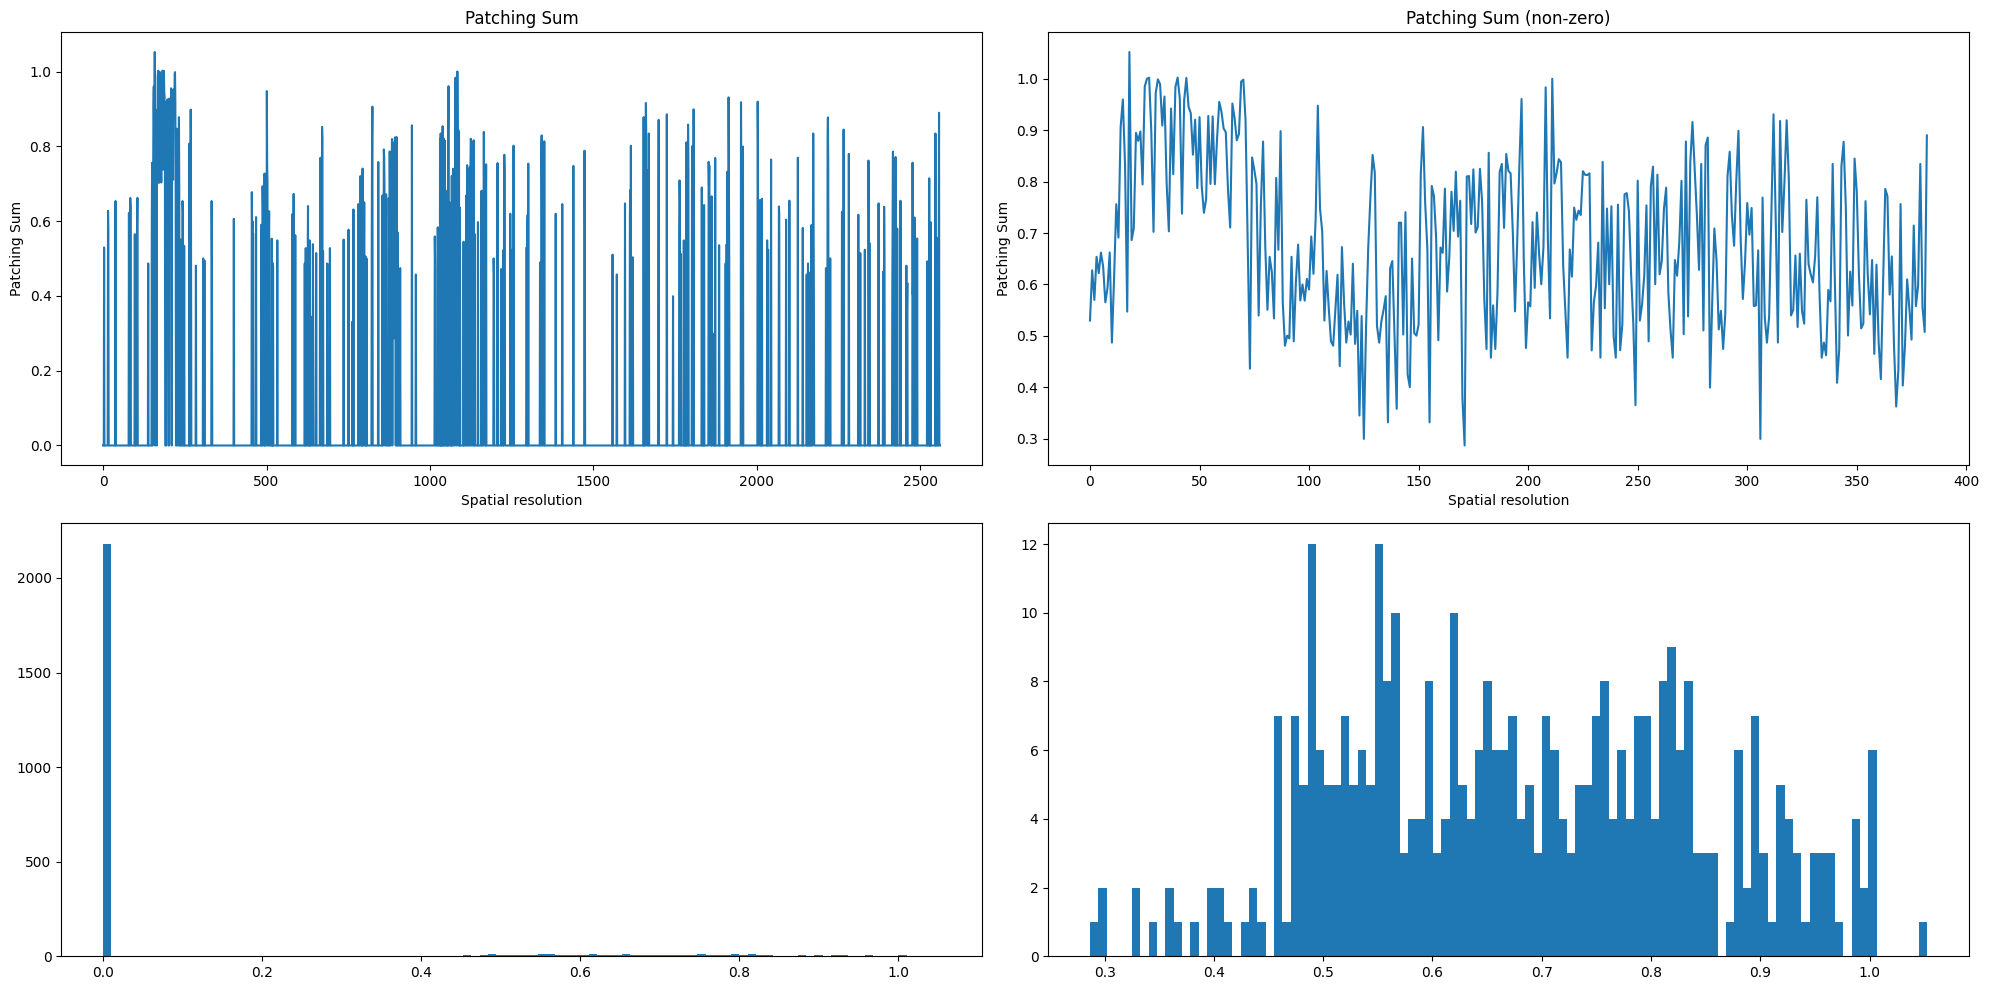

In [ ]:
ps = PatchingSum(alt, spatial_resolution)
ps_non_zero = ps[ps != 0].reset_index(drop=True)
# Plot cs
fig, ax = plt.subplots(2,2, figsize=(20, 10))
ax = ax.flatten()
ax[0].plot(ps)
ax[0].set(title='Patching Sum', xlabel='Spatial resolution', ylabel='Patching Sum')
ax[1].plot(ps_non_zero)
ax[1].set(title='Patching Sum (non-zero)', xlabel='Spatial resolution', ylabel='Patching Sum')
ax[2].hist(ps, bins=100)
ax[3].hist(ps_non_zero, bins=100)
plt.tight_layout()
plt.show()


In [58]:
data_aran_vh[['BeginChainage', 'EndChainage']]

,BeginChainage,EndChainage
0,25412.869620,25411.869620
1,25411.869620,25410.869620
2,25410.869620,25409.869620
3,25409.869620,25408.869620
4,25408.869620,25407.869620
...,...,...
25488,-75.130384,-76.130384
25489,-76.130384,-77.130384
25490,-77.130384,-78.130384
25491,-78.130384,-79.130384


In [60]:
dist = []
prev_dist = 0
for i, val in enumerate(data_aran_hh['BeginChainage']):
    if i == 0:
        prev_dist = val
    dist += [abs(val - prev_dist)]
    prev_dist = val

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0000000030000002, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999996, 1.0, 1.0000000000000002, 0.9999999999999999, 1.0, 1.0, 0.9999999999999998, 1.0, 1.0000000000000004, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999969999998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999799999983, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

### Load autopi data

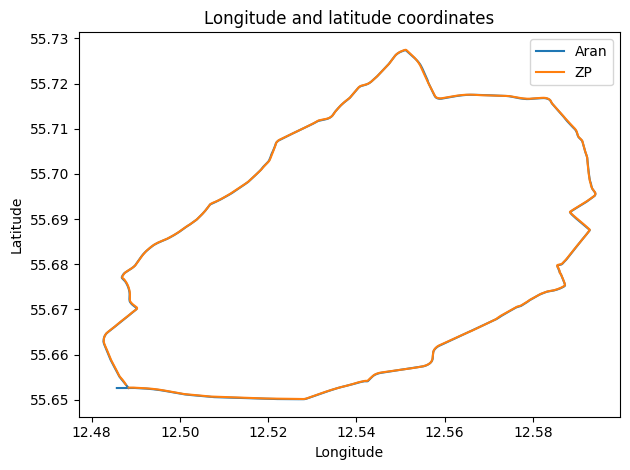

In [9]:
# Plot longitude and latitude coordinates for aran and zp
fig, ax = plt.subplots()

lat_aran_hh = data_aran_hh['Lat']
lon_aran_hh = data_aran_hh['Lon']
lat_zp_hh = data_zp_hh['Lat']
lon_zp_hh = data_zp_hh['Lon']

ax.plot(lon_aran_hh, lat_aran_hh, label='Aran')
ax.plot(lon_zp_hh, lat_zp_hh, label='ZP')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Longitude and latitude coordinates')
ax.legend()
plt.tight_layout()
plt.show()

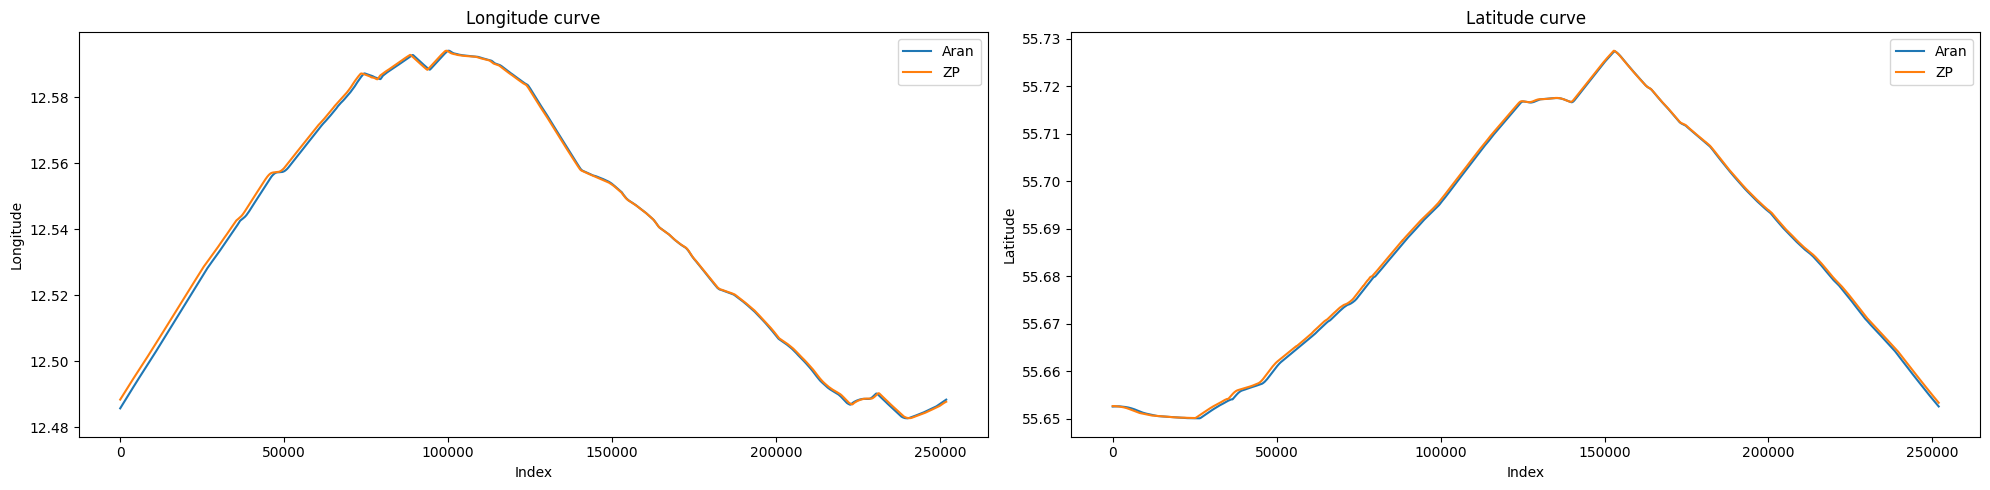

In [14]:
# Plot longitude curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.plot(np.linspace(0, len(lon_zp_hh), len(lon_aran_hh)), lon_aran_hh, label='Aran')
ax1.plot(np.linspace(0, len(lon_zp_hh), len(lon_zp_hh)), lon_zp_hh, label='ZP')
ax1.set_xlabel('Index')
ax1.set_ylabel('Longitude')
ax1.set_title('Longitude curve')
ax1.legend()

# Plot latitude curve
ax2.plot(np.linspace(0, len(lat_zp_hh), len(lat_aran_hh)), lat_aran_hh, label='Aran')
ax2.plot(np.linspace(0, len(lat_zp_hh), len(lat_zp_hh)), lat_zp_hh, label='ZP')
ax2.set_xlabel('Index')
ax2.set_ylabel('Latitude')
ax2.set_title('Latitude curve')
ax2.legend()

plt.tight_layout()
plt.show()

In [21]:
def unpack_hdf5(hdf5_file):
    with h5py.File(hdf5_file, 'r') as f:
        data = unpack_hdf5_(f)
    return data

def unpack_hdf5_(group):
    data = {}
    for key in group.keys():
        if isinstance(group[key], h5py.Group):
            data[key] = unpack_hdf5_(group[key])
        else:
            data[key] = group[key][()]
    return data

In [22]:
data_autopi_hh = unpack_hdf5('../data/raw/AutoPi_CAN/platoon_CPH1_HH.hdf5')

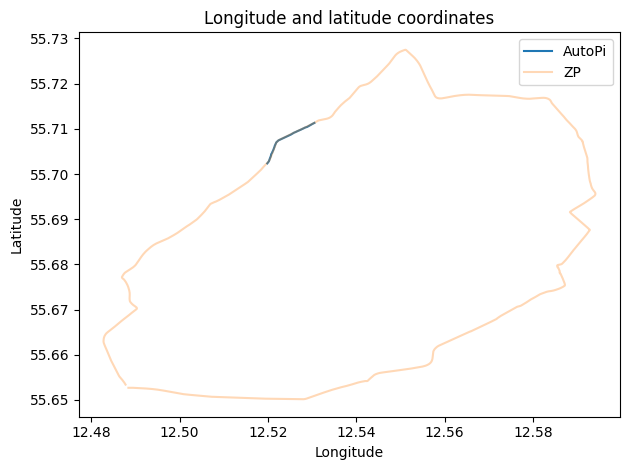

In [23]:
# plot longitude and latitude coordinates for AutoPi and ZP
fig, ax = plt.subplots()

autopi_hh_gps = data_autopi_hh['GM']['16010']['pass_5']['gps']

ax.plot(autopi_hh_gps[:, 2], autopi_hh_gps[:, 1], label='AutoPi')
ax.plot(lon_zp_hh, lat_zp_hh, alpha=0.3, label='ZP')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Longitude and latitude coordinates')
ax.legend()
plt.tight_layout()
plt.show()

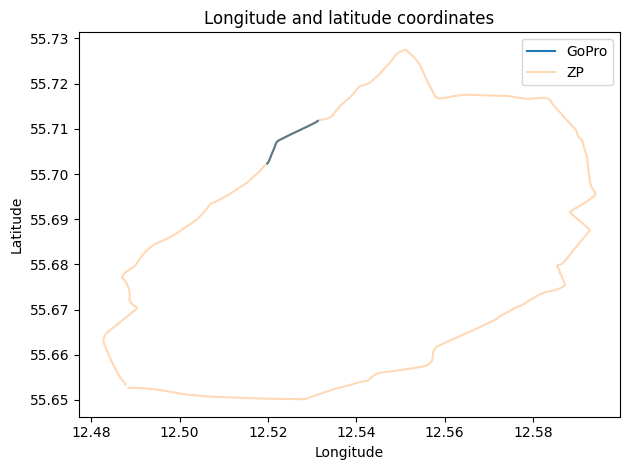

In [24]:
gopro_gps = data_autopi_hh['gopro']['trip_1']['pass_1']['gps'][:, 3:5]

fig, ax = plt.subplots()

ax.plot(gopro_gps[:, 1], gopro_gps[:, 0], label='GoPro')
ax.plot(lon_zp_hh, lat_zp_hh, alpha=0.3, label='ZP')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Longitude and latitude coordinates')
ax.legend()
plt.tight_layout()
plt.show()

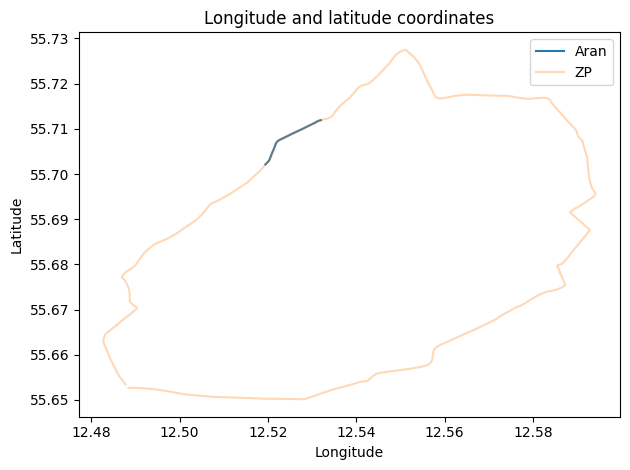

In [25]:
autopi_aran_gps = data_autopi_hh['aran']['trip_1']['pass_1']['GPS']

fig, ax = plt.subplots()

ax.plot(autopi_aran_gps[:, 1], autopi_aran_gps[:, 0], label='Aran')
ax.plot(lon_zp_hh, lat_zp_hh, alpha=0.3, label='ZP')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Longitude and latitude coordinates')
ax.legend()
plt.tight_layout()
plt.show()

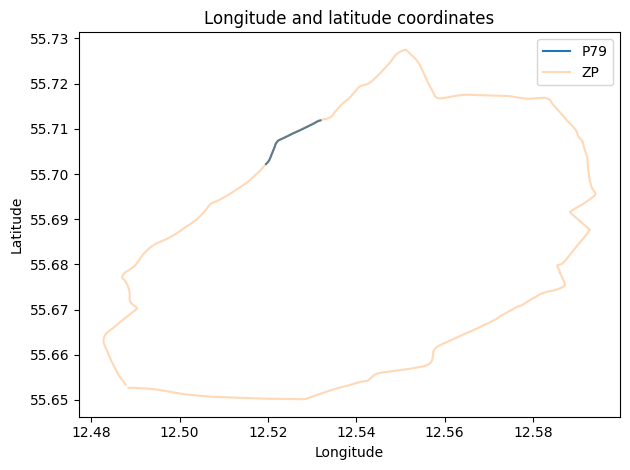

In [26]:
autopi_p79_gps = data_autopi_hh['p79']['trip_1']['pass_1']['GPS']

fig, ax = plt.subplots()

ax.plot(autopi_p79_gps[:, 1], autopi_p79_gps[:, 0], label='P79')
ax.plot(lon_zp_hh, lat_zp_hh, alpha=0.3, label='ZP')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Longitude and latitude coordinates')
ax.legend()
plt.tight_layout()
plt.show()

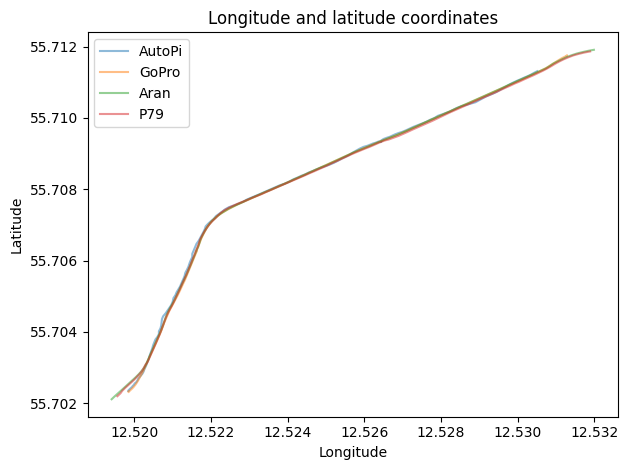

In [27]:
# Plot all autopi gps data
fig, ax = plt.subplots()

ax.plot(autopi_hh_gps[:, 2], autopi_hh_gps[:, 1], alpha=0.5, label='AutoPi')
ax.plot(gopro_gps[:, 1], gopro_gps[:, 0], alpha=0.5, label='GoPro')
ax.plot(autopi_aran_gps[:, 1], autopi_aran_gps[:, 0], alpha=0.5, label='Aran')
ax.plot(autopi_p79_gps[:, 1], autopi_p79_gps[:, 0], alpha=0.5, label='P79')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Longitude and latitude coordinates')
ax.legend()
plt.tight_layout()
plt.show()


In [29]:
data_autopi_hh['p79']['trip_1']['pass_1'].keys()

dict_keys(['Crossfall', 'GPS', 'IRI', 'MPD', 'Rutting', 'TransversalProfile', 'Velocity'])

In [30]:
laser_autopi = data_autopi_hh['p79']['trip_1']['pass_1']['TransversalProfile']

laser_data = data_zp_hh.to_numpy()[:, 1:26]


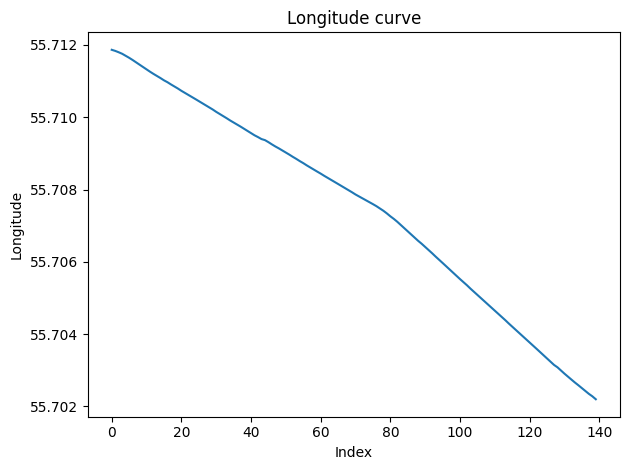

In [31]:
fig, ax = plt.subplots()

ax.plot(autopi_p79_gps[:, 0])
ax.set_xlabel('Index')
ax.set_ylabel('Longitude')
ax.set_title('Longitude curve')
plt.tight_layout()
plt.show()

In [32]:
data_autopi_hh['p79']['trip_1']['pass_1']['Rutting'].shape

(140, 4)